IE500 - Statistical Machine Learning for Engineers Project.
** Market Basket Analysis Using Association **
 - By Aseem Salim
 - UB # 50545729

Import Important Libraries

In [1]:
import pandas as pd # For Data loading and processing
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth

In [2]:
df0 = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df0.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df0.loc[df0['StockCode']=='85123A', 'Description']

0         WHITE HANGING HEART T-LIGHT HOLDER
49        WHITE HANGING HEART T-LIGHT HOLDER
66        WHITE HANGING HEART T-LIGHT HOLDER
220       WHITE HANGING HEART T-LIGHT HOLDER
262       WHITE HANGING HEART T-LIGHT HOLDER
                         ...                
539342    CREAM HANGING HEART T-LIGHT HOLDER
539979    WHITE HANGING HEART T-LIGHT HOLDER
540217    WHITE HANGING HEART T-LIGHT HOLDER
540837    CREAM HANGING HEART T-LIGHT HOLDER
541639    CREAM HANGING HEART T-LIGHT HOLDER
Name: Description, Length: 2313, dtype: object

In [6]:
# Store Unique Description Values for Stock Code.
StockCode = pd.DataFrame(df0.groupby('StockCode')['Description']
                        .apply(lambda x: x.drop_duplicates().head(1))
                        .reset_index(drop=True), columns=["Description"])

# Add a new column 'StockCode' with the first stock code in each group
StockCode['StockCode'] = df0.groupby('StockCode')['StockCode'].first().reset_index(drop=True)
StockCode.head()

,Description,StockCode
0,INFLATABLE POLITICAL GLOBE,10002
1,GROOVY CACTUS INFLATABLE,10080
2,DOGGY RUBBER,10120
3,HEARTS WRAPPING TAPE,10123C
4,NaN,10123G


In [7]:
StockCode.shape

(4070, 2)

In [8]:
df2 = StockCode.copy()
print(df0.shape)
print(df2.shape)

(541909, 8)
(4070, 2)


In [9]:
df1 = df0.copy() # Creating new dataframe for processing

df1 = df1.merge(df2,left_on='StockCode',right_on='StockCode')
df1.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


In [10]:
df2 = df1.copy()
df2.drop('Description_x', axis=1, inplace=True)
df2.rename(columns={'Description_y': 'Description'}, inplace=True)

df2.drop('StockCode', axis=1, inplace=True)

print(df2.shape)
df2.head()

(541909, 7)


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER


In [11]:
miss_total = df2.isnull().sum().sort_values(ascending = False)
miss_pct = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending = False)
miss_value_df = pd.concat([miss_total,miss_pct],axis = 1, keys = ['missing total','missing percent'])
miss_value_df

,missing total,missing percent
CustomerID,135080,0.249267
Description,1456,0.002687
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [12]:
df2.dropna(subset=['Description'], inplace=True)

miss_total = df2.isnull().sum().sort_values(ascending = False)
miss_pct = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending = False)
miss_value_df = pd.concat([miss_total,miss_pct],axis = 1, keys = ['missing total','missing percent'])
miss_value_df

print(df2.shape)

(540453, 7)


In [13]:
# Create a new column 'HasCustomerID' with True for non-null values and False for null values
df2['HasCustomerID'] = df2['CustomerID'].notna()
df2.drop('CustomerID', axis=1, inplace=True)

miss_total = df2.isnull().sum().sort_values(ascending = False)
miss_pct = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending = False)
miss_value_df = pd.concat([miss_total,miss_pct],axis = 1, keys = ['missing total','missing percent'])
miss_value_df

,missing total,missing percent
InvoiceNo,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
Country,0,0.0
Description,0,0.0
HasCustomerID,0,0.0


In [14]:
# Count the number of duplicates in the entire DataFrame
total_duplicates = df2.duplicated().sum()
print(f'Total Number of Duplicates: {total_duplicates}')

print(df2.shape)

Total Number of Duplicates: 5751
(540453, 7)


In [15]:
df3 = df2.copy()
df3.drop_duplicates(keep = 'first', inplace = True)
df3.shape

(534702, 7)

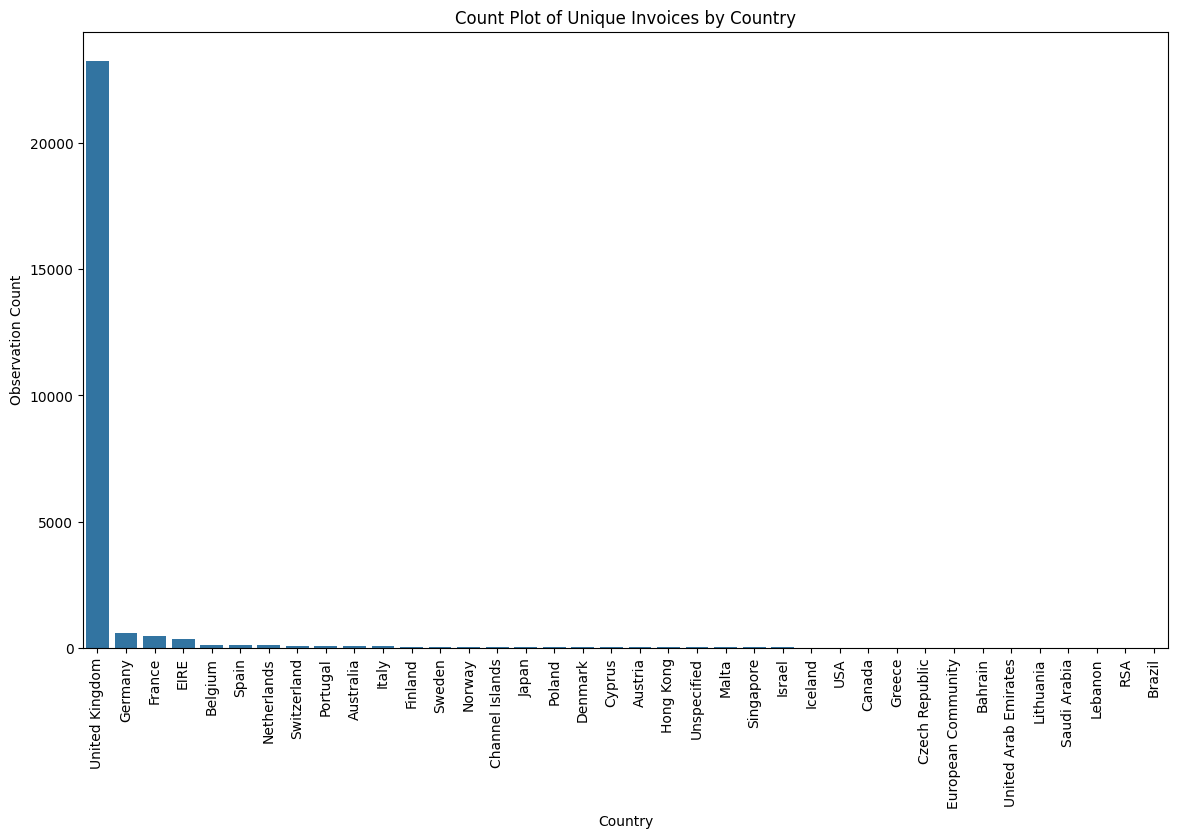

In [16]:
# Drop duplicates based on 'InvoiceNo'
df_unique_invoices = df3.drop_duplicates(subset='InvoiceNo')

# Count observations based on the "Country" column in the modified DataFrame
country_counts = df_unique_invoices['Country'].value_counts().reset_index(name='Observation Count')

# Create a count plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Observation Count', data=country_counts, order=country_counts.sort_values('Observation Count', ascending=False)['Country'])
plt.xticks(rotation=90)
plt.title('Count Plot of Unique Invoices by Country')
plt.show()

In [17]:
# Calculate the percentage of unique invoices for each country
country_percentage = (df_unique_invoices['Country'].value_counts() / len(df_unique_invoices)) * 100
country_percentage = country_percentage.reset_index(name='Percentage')

# Display the table
print(country_percentage)

                 Country  Percentage
0         United Kingdom   90.635230
1                Germany    2.346064
2                 France    1.796571
3                   EIRE    1.399065
4                Belgium    0.463757
5                  Spain    0.409197
6            Netherlands    0.393609
7            Switzerland    0.288387
8               Portugal    0.276695
9              Australia    0.268901
10                 Italy    0.214341
11               Finland    0.187062
12                Sweden    0.179267
13                Norway    0.155885
14       Channel Islands    0.128605
15                 Japan    0.109119
16                Poland    0.093531
17               Denmark    0.081839
18                Cyprus    0.077942
19               Austria    0.074045
20             Hong Kong    0.058457
21           Unspecified    0.050663
22                 Malta    0.038971
23             Singapore    0.038971
24                Israel    0.035074
25               Iceland    0.027280
2

In [18]:
# Filter observations for the UK
df4 = df3[df3['Country'] == 'United Kingdom']

# Drop Country column
df4.drop('Country', axis=1, inplace=True)

print(df4.shape)

# Display the first few rows of the new DataFrame
df4.head()

(488490, 6)


/var/folders/4l/mlp9xc7541lb5rfzdxts3x9w0000gn/T/ipykernel_7490/874329225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Country', axis=1, inplace=True)


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Description,HasCustomerID
0,536365,6,12/1/2010 8:26,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
1,536373,6,12/1/2010 9:02,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
2,536375,6,12/1/2010 9:32,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
3,536390,64,12/1/2010 10:19,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
4,536394,32,12/1/2010 10:39,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True


In [19]:
# Count rows with Quantity less than or equal to zero
quantity_less_than_or_equal_to_zero_count = (df4['Quantity'] <= 0).sum()

# Display the count
print("Count of Rows with Quantity less than or equal to 0:", quantity_less_than_or_equal_to_zero_count)

# Count rows with Quantity less than or equal to zero
quantity_less_than_or_equal_to_zero_count = (df4['UnitPrice'] <= 0).sum()

# Display the count
print("Count of Rows with UnitPrice less than or equal to 0:", quantity_less_than_or_equal_to_zero_count)

Count of Rows with Quantity less than or equal to 0: 8977
Count of Rows with UnitPrice less than or equal to 0: 2272


In [20]:
# Remove rows with Quantity less than or equal to zero
df4 = df4[df4['Quantity'] > 0]

# Remove rows with UnitPrice less than or equal to zero
df4 = df4[df4['UnitPrice'] > 0]

# Reset the index after removing rows
df4 = df4.reset_index(drop=True)

print(df4.shape)
# Display the first few rows of the cleaned DataFrame
df4.head()

(478435, 6)


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Description,HasCustomerID
0,536365,6,12/1/2010 8:26,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
1,536373,6,12/1/2010 9:02,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
2,536375,6,12/1/2010 9:32,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
3,536390,64,12/1/2010 10:19,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
4,536394,32,12/1/2010 10:39,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True


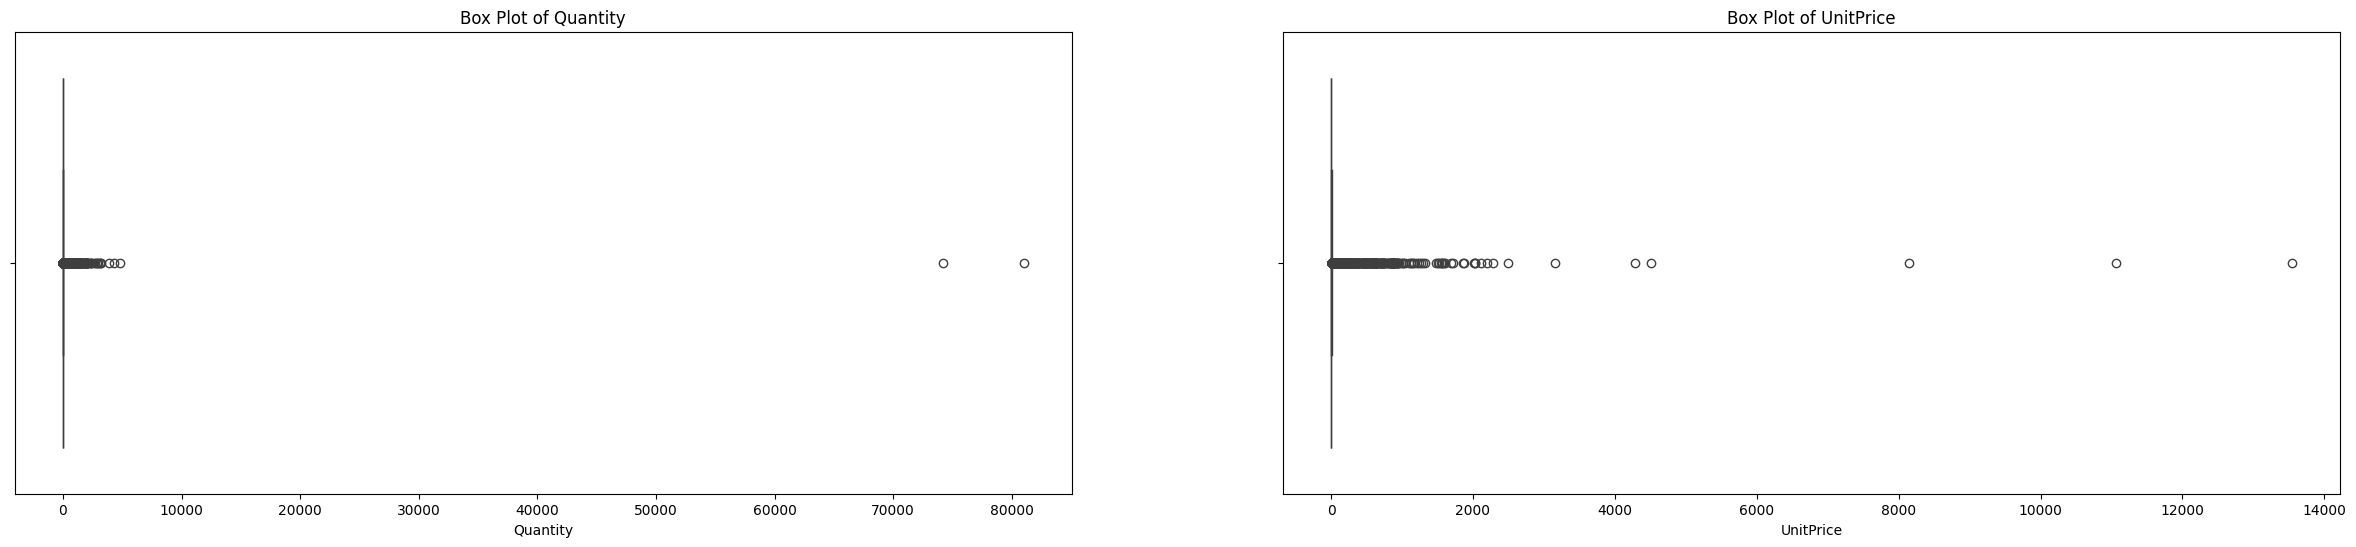

In [21]:
# Enable inline plotting
%matplotlib inline

# Create separate box plots for Quantity and UnitPrice

plt.figure(figsize=(30, 6))  # Adjust the width as needed

# Box plot for Quantity
plt.subplot(1, 2, 1, aspect='auto')
sns.boxplot(x=df4['Quantity'])
plt.title('Box Plot of Quantity')

# Box plot for UnitPrice
plt.subplot(1, 2, 2, aspect='auto')
sns.boxplot(x=df4['UnitPrice'])
plt.title('Box Plot of UnitPrice')


plt.show()

In [22]:
df4.shape

(478435, 6)

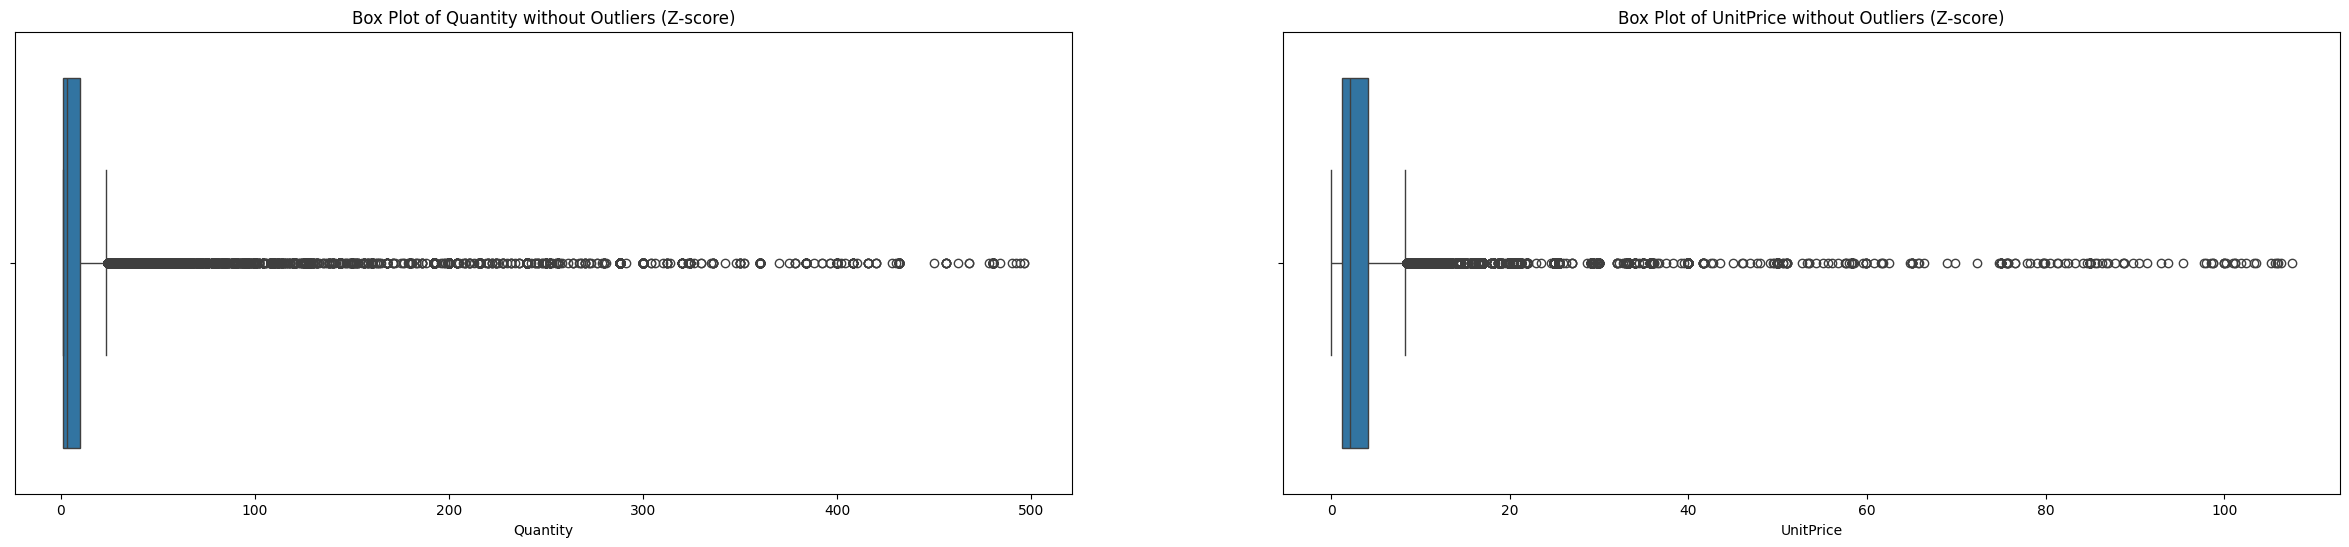

In [23]:
from scipy import stats

# Create a wide figure for box plots without outliers
plt.figure(figsize=(30, 6))

# Remove outliers in Quantity using Z-score
z_scores_quantity = stats.zscore(df4['Quantity'])
df4 = df4[(z_scores_quantity >= -3) & (z_scores_quantity <= 3)]

# Box plot for Quantity without outliers
plt.subplot(1, 2, 1, aspect='auto')
sns.boxplot(x=df4['Quantity'])
plt.title('Box Plot of Quantity without Outliers (Z-score)')

# Remove outliers in UnitPrice using Z-score
z_scores_unit_price = stats.zscore(df4['UnitPrice'])
df4 = df4[(z_scores_unit_price >= -3) & (z_scores_unit_price <= 3)]

# Box plot for UnitPrice without outliers
plt.subplot(1, 2, 2, aspect='auto')
sns.boxplot(x=df4['UnitPrice'])
plt.title('Box Plot of UnitPrice without Outliers (Z-score)')

plt.show()

In [24]:
df4.shape

(477312, 6)

In [25]:
# Reset the index after removing rows
df4 = df4.reset_index(drop=True)
print(df4.shape)
df4.head()
#df4.describe()
#df4.info()

(477312, 6)


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Description,HasCustomerID
0,536365,6,12/1/2010 8:26,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
1,536373,6,12/1/2010 9:02,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
2,536375,6,12/1/2010 9:32,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
3,536390,64,12/1/2010 10:19,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True
4,536394,32,12/1/2010 10:39,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True


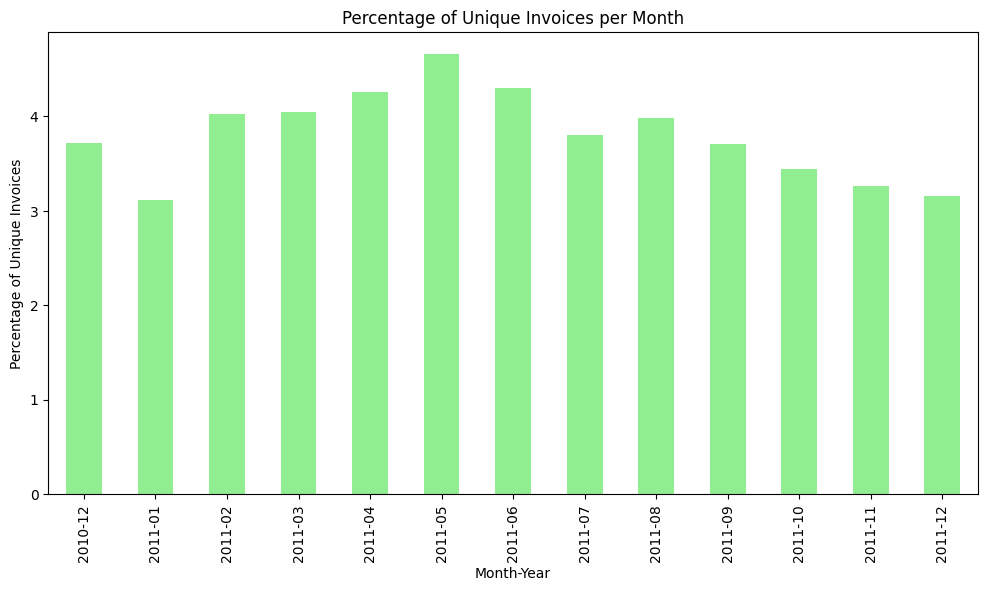

In [26]:
# Convert 'InvoiceDate' to datetime
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])

# Extract the year from 'InvoiceDate'
df4['InvoiceYear'] = df4['InvoiceDate'].dt.year

# Extract month and year from 'InvoiceDate'
df4['MonthYear'] = df4['InvoiceDate'].dt.to_period('M')

# Calculate the percentage of unique invoices relative to the total number of invoices per month
unique_invoices_per_month = df4.groupby('MonthYear')['InvoiceNo'].nunique()
total_invoices_per_month = df4.groupby('MonthYear')['InvoiceNo'].count()
percentage_unique_invoices = (unique_invoices_per_month / total_invoices_per_month) * 100

# Plot the data
plt.figure(figsize=(12, 6))
percentage_unique_invoices.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Unique Invoices per Month')
plt.xlabel('Month-Year')
plt.ylabel('Percentage of Unique Invoices')
plt.show()

In [27]:
# Keep data of only year 2011
df4 = df4[df4['InvoiceDate'].dt.year == 2011]

# Drop Date column
df4.drop(['InvoiceDate', 'InvoiceYear', 'MonthYear'], axis=1, inplace=True)

df4.head()

,InvoiceNo,Quantity,UnitPrice,Description,HasCustomerID
223,539993,12,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
224,540014,6,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
225,540016,10,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
226,540026,1,5.91,WHITE HANGING HEART T-LIGHT HOLDER,False
227,540033,32,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True


In [28]:
df5 = df4.copy()
# Count the occurrences of each invoice number
invoice_counts = df5['InvoiceNo'].value_counts()

# Filter out rows where the invoice number occurs only once
invoices_to_remove = invoice_counts[invoice_counts <= 1].index
df5 = df5[~df5['InvoiceNo'].isin(invoices_to_remove)]

print(invoices_to_remove)

print(df5.shape)

# Display the filtered DataFrame
df5.head()

Index(['546404', '565143', '546902', '560205', '558387', '576358', '547165',
       '577129', '562533', '555878',
       ...
       '563573', '556684', '549022', '550151', '560917', '550377', '546014',
       '543202', '549841', '579108'],
      dtype='object', name='InvoiceNo', length=1244)
(437479, 5)


,InvoiceNo,Quantity,UnitPrice,Description,HasCustomerID
223,539993,12,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
224,540014,6,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
225,540016,10,2.95,WHITE HANGING HEART T-LIGHT HOLDER,True
226,540026,1,5.91,WHITE HANGING HEART T-LIGHT HOLDER,False
227,540033,32,2.55,WHITE HANGING HEART T-LIGHT HOLDER,True


In [29]:
# Find the number of unique descriptions
unique_descriptions_count = df5['Description'].nunique()

# Display the result
print("Number of unique descriptions:", unique_descriptions_count)

Number of unique descriptions: 3642


In [30]:
"""# Create a binary flag column
df5['Flag'] = 1
"""
# drop Quantity, UnitPrice and HasCustomerID columns
df5.drop(['Quantity', 'UnitPrice', 'HasCustomerID'], axis=1, inplace=True)

# Data Preprocessing: Create a binary matrix
df6 = (df5.assign(Flag=True)
       .pivot_table(index='InvoiceNo', columns='Description', values='Flag', fill_value=False)
       .reset_index())

"""# Pivot the DataFrame to get the desired format
df6 = df5.pivot_table(index='InvoiceNo', columns='Description', fill_value=0, aggfunc='max').fillna(0)

# Reset the index to make 'InvoiceNo' a regular column
df6.reset_index(inplace=True)
"""
# Display the resulting DataFrame
print(df6)

Description InvoiceNo  4 PURPLE FLOCK DINNER CANDLES  \
0              539993                          False   
1              540001                          False   
2              540002                          False   
3              540003                          False   
4              540005                          False   
...               ...                            ...   
15180          581582                          False   
15181          581583                          False   
15182          581584                          False   
15183          581585                          False   
15184          581586                          False   

Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER  \
0                                    False              False   
1                                    False              False   
2                                    False              False   
3                                    False              False   
4 

In [31]:
print(df6.shape)
df6.head()

(15185, 3643)


Description,InvoiceNo,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,check,found,mailout,mailout,wet damaged
0,539993,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,540001,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,540002,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,540003,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,540005,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Remove the last 5 columns
df6 = df6.iloc[:, :-5]

df6 = df6.drop('InvoiceNo', axis=1)

# Display the updated DataFrame
df6.head()
#df6.columns

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Association Rule Mining Using Apriori Algorithm

In [33]:
# Generate Frequent Itemsets from Binary matrix using Apriori Algorithm. This will returns support values along with the itemsets
freq_items = apriori(df6,min_support=0.02,use_colnames=True).sort_values(by='support',ascending=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
freq_items.head()

,support,itemsets
317,0.126902,(WHITE HANGING HEART T-LIGHT HOLDER)
122,0.119065,(JUMBO BAG RED RETROSPOT)
179,0.101021,(PARTY BUNTING)
222,0.09944,(REGENCY CAKESTAND 3 TIER)
146,0.086664,(LUNCH BAG RED RETROSPOT)


In [35]:
support_items = freq_items.copy()
support_items = support_items[['itemsets', 'support']]

# Set 'itemsets' as the index and drop the default index
support_items.set_index('itemsets', drop=True, inplace=True)
support_items.head(10)

,support
itemsets,
(WHITE HANGING HEART T-LIGHT HOLDER),0.126902
(JUMBO BAG RED RETROSPOT),0.119065
(PARTY BUNTING),0.101021
(REGENCY CAKESTAND 3 TIER),0.09944
(LUNCH BAG RED RETROSPOT),0.086664
(ASSORTED COLOUR BIRD ORNAMENT),0.083569
(SET OF 3 CAKE TINS PANTRY DESIGN ),0.07784
(LUNCH BAG BLACK SKULL.),0.075864
(SMALL POPCORN HOLDER),0.075864


In [36]:
# Filter for itemsets with a minimum of two items
freq_items_min_two_items = freq_items[freq_items['itemsets'].apply(lambda x: len(x) >= 2)]

# Sort itemsets by support in descending order
freq_items_min_two_items = freq_items_min_two_items.sort_values(by='support', ascending=False)

# Display the top itemset
top_itemset = freq_items_min_two_items.head(5)

# Set 'itemsets' as the index and drop the default index
top_itemset.set_index('itemsets', drop=True, inplace=True)

print("Top Item Set with a Minimum of Two Items:")
top_itemset

Top Item Set with a Minimum of Two Items:


,support
itemsets,
"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKADOT)",0.049062
"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",0.043662
"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",0.042937
"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)",0.041488
"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)",0.037932


In [37]:
# Generate Association Rules on the frequent itemsets respect to the support
rules = association_rules(freq_items,metric='support',min_threshold=.04).sort_values(by='support',ascending=False)

# Display rules with only main information (support, confidence, lift)
main_info_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Print the rules table
print("Support Rules Table:")
main_info_rules.head(10)

Support Rules Table:


,antecedents,consequents,support,confidence,lift
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.049062,0.412058,5.677943
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.049062,0.676044,5.677943
2,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.043662,0.623120,5.233452
3,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.043662,0.366704,5.233452
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042937,0.735062,12.815059
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042937,0.748565,12.815059
6,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.041488,0.592662,4.977642
7,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.041488,0.348451,4.977642


In [38]:
rules = association_rules(freq_items,metric='lift',min_threshold=1).sort_values(by='lift',ascending=False)

# Display rules with only main information (support, confidence, lift)
main_info_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Print the rules table
print("Lift Rules Table:")
main_info_rules.head(10)

Lift Rules Table:


,antecedents,consequents,support,confidence,lift
191,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.023247,0.786192,24.819789
190,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.023247,0.733888,24.819789
246,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.021666,0.781473,23.973056
247,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.021666,0.664646,23.973056
38,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.032203,0.750000,16.386691
39,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.032203,0.703597,16.386691
41,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.032203,0.561424,15.729185
36,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.032203,0.902214,15.729185
280,(JUMBO BAG 50'S CHRISTMAS ),(JUMBO BAG VINTAGE CHRISTMAS ),0.020612,0.467862,15.614268
281,(JUMBO BAG VINTAGE CHRISTMAS ),(JUMBO BAG 50'S CHRISTMAS ),0.020612,0.687912,15.614268


In [39]:
rules = association_rules(freq_items,metric='confidence',min_threshold=0.7).sort_values(by='confidence',ascending=False)

# Display rules with only main information (support, confidence, lift)
main_info_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Print the rules table
print("Confidence Rules Table:")
main_info_rules.head(10)

Confidence Rules Table:


,antecedents,consequents,support,confidence,lift
5,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.032203,0.902214,15.729185
6,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.032203,0.853403,14.609838
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037735,0.824460,14.373630
12,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT),0.023444,0.803612,6.749361
10,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.025552,0.803313,6.746849
18,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG PINK PO...",(JUMBO BAG RED RETROSPOT),0.020151,0.796875,6.692780
17,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.021534,0.791768,13.554668
14,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.023247,0.786192,24.819789
16,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",(GREEN REGENCY TEACUP AND SAUCER),0.021534,0.786058,13.704117
15,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.021666,0.781473,23.973056
